<a href="https://colab.research.google.com/github/s34836/WUM/blob/main/Lab_04_Multilayer_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-layer Networks

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

mlb = MultiLabelBinarizer()
mlb.fit(train_data + test_data)
X_train_full = mlb.transform(train_data)
y_train_full = train_labels
X_test = mlb.transform(test_data)
y_test = test_labels

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.33, random_state=42)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knn.score(X_valid, y_valid)

0.6416969696969697

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │       159,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,273 (626.07 KB)

 Trainable params: 160,273 (626.07 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=15)

Epoch 1/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7302 - loss: 0.5198 - val_accuracy: 0.8384 - val_loss: 0.3638
Epoch 2/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8829 - loss: 0.2841 - val_accuracy: 0.8722 - val_loss: 0.2981
Epoch 3/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9079 - loss: 0.2307 - val_accuracy: 0.8661 - val_loss: 0.3237
Epoch 4/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9228 - loss: 0.1928 - val_accuracy: 0.8577 - val_loss: 0.3493
Epoch 5/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9431 - loss: 0.1549 - val_accuracy: 0.8530 - val_loss: 0.3949
Epoch 6/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9439 - loss: 0.1436 - val_accuracy: 0.8417 - val_loss: 0.4185
Epoch 7/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9603 - loss: 0.1115 - val_accuracy: 0.8630 - val_loss: 0.3903
Epoch 8/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9581 - loss: 0.1076 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


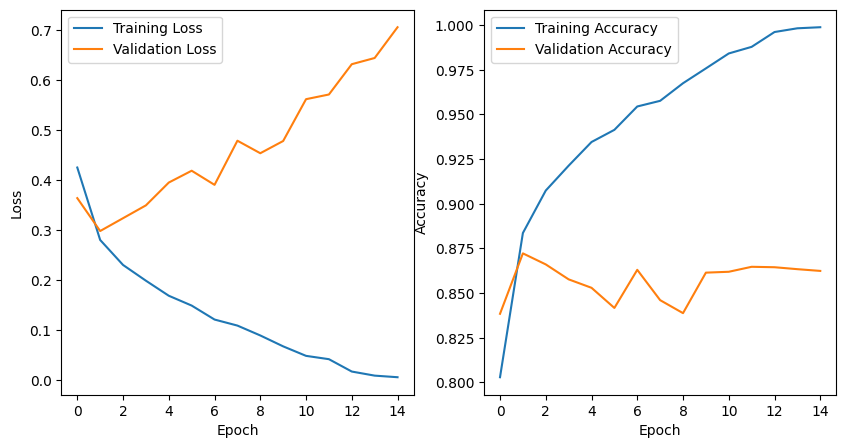

In [7]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
print(history.history.keys())
epoch = range(len(loss))

ax1.plot(epoch, loss, label="Training Loss")
ax1.plot(epoch, val_loss, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epoch, accuracy, label="Training Accuracy")
ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_full, y_train_full, batch_size=32, epochs=5)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7696 - loss: 0.4831
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8913 - loss: 0.2648
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9106 - loss: 0.2235
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9221 - loss: 0.1944
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9361 - loss: 0.1687


In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8670 - loss: 0.3255


In [10]:
from IPython.display import Markdown
Markdown(f"## Test loss: {test_loss:.2f} \n ## Test accuracy: {test_accuracy:.2f}")

## Test loss: 0.33 
 ## Test accuracy: 0.87

## Tasks

1. [TensorFlow Playground](https://playground.tensorflow.org) is a neural network simulator and visualization tool. Create a few networks with different architectures and check how they will be affected by different hyperparameters.
2. Create a network to classify the MNIST dataset.
    - Test a few different network topologies (different numbers and sizes of hidden layers) and hyperparameters, such as hidden layer activation functions (`sigmoid`, `tanh`, `relu`, ...).
    - The size of the output layer should correspond to the number of classes (10). The output layer should use the `softmax` activation function.
    - Use `loss="sparse_categorical_crossentropy"`.

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# --- Dane MNIST ---
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizacja i spłaszczenie obrazków
X_train_full = X_train_full.reshape(-1, 28*28) / 255.
X_test = X_test.reshape(-1, 28*28) / 255.

# Podział na trening i walidację
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1
)

# --- Funkcja do budowy modelu ---
def build_and_train_model(hidden_layers, activation, optimizer, epochs=10):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(784,)))
    for units in hidden_layers:
        model.add(tf.keras.layers.Dense(units, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=epochs,
        batch_size=64,
        verbose=0
    )
    val_acc = history.history["val_accuracy"][-1]
    print(f"Layers={hidden_layers}, Activation={activation}, "
          f"Optimizer={optimizer.__class__.__name__}, Val acc={val_acc:.4f}")
    return model, history

# --- Eksperymenty z różnymi architekturami ---
configs = [
    {"hidden_layers": [32], "activation": "sigmoid", "optimizer": tf.keras.optimizers.SGD(0.1)},
    {"hidden_layers": [64], "activation": "tanh",    "optimizer": tf.keras.optimizers.Adam(0.001)},
    {"hidden_layers": [128], "activation": "relu",   "optimizer": tf.keras.optimizers.Adam(0.001)},
    {"hidden_layers": [128, 64], "activation": "relu", "optimizer": tf.keras.optimizers.Adam(0.001)},
    {"hidden_layers": [256, 128, 64], "activation": "relu", "optimizer": tf.keras.optimizers.Adam(0.001)},
]

results = []
for cfg in configs:
    model, history = build_and_train_model(**cfg)
    results.append((cfg, history))

# --- Ewaluacja najlepszego (ostatniego) modelu ---
best_model = results[-1][1].model  # model z najlepszego wyniku
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"\nBest model test accuracy: {test_acc:.4f}")

Layers=[32], Activation=sigmoid, Optimizer=SGD, Val acc=0.9387
Layers=[64], Activation=tanh, Optimizer=Adam, Val acc=0.9683
Layers=[128], Activation=relu, Optimizer=Adam, Val acc=0.9780
Layers=[128, 64], Activation=relu, Optimizer=Adam, Val acc=0.9770
Layers=[256, 128, 64], Activation=relu, Optimizer=Adam, Val acc=0.9747

Best model test accuracy: 0.9763
